In [1]:
import pandas as pd

In [2]:
# read the csv file of the event log
df = pd.read_csv(r'...datasets\real_world_logs\bpic15-0.3-5.csv')

C:\Users\Nela\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3326: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
# print out the head of the event log
df.head()

case_id  event_position         activity_name1                  timestamp  \
0  10061280               1  01_HOOFD_010+complete  2014-01-06T00:00:00+01:00   
1  10061280               2  01_HOOFD_011+complete  2014-01-10T00:00:00+01:00   
2  10061280               3  01_HOOFD_020+complete  2014-01-10T00:00:00+01:00   
3  10061280               4    03_GBH_005+complete  2014-01-10T00:00:00+01:00   
4  10061280               5   05_EIND_010+complete  2014-01-10T00:00:00+01:00   

  monitoringResource org:resource      label anomaly_type  \
0            8492512      8492512  anomalous    Attribute   
1             560604      8492512  anomalous    Attribute   
2             560604      8492512  anomalous    Attribute   
3             560604      8492512  anomalous    Attribute   
4             560604      8492512  anomalous    Attribute   

                                 anomaly_description   action_code  \
0  {'index': [35, 41, 46], 'attribute_index': [1,...  01_HOOFD_010   
1  {'index': [35, 41, 46], 'attribute_index': [1,...  01_HOOFD_011   
2  {'index': [35, 41, 46], 'attribute_index': [1,...  01_HOOFD_020   
3  {'index': [35, 41, 46], 'attribute_index': [1,...    03_GBH_005   
4  {'index': [35, 41, 46], 'attribute_index': [1,...   05_EIND_010   

                      activity_name                          activityNameNL  \
0  register submission date request  registratie datum binnenkomst aanvraag   
1              OLO messaging active             OLO berichtenverkeer actief   
2         send confirmation receipt          versturen ontvangstbevestiging   
3          applicant is stakeholder             aanvrager is belanghebbende   
4              terminate on request                   beeindigen op verzoek   

   concept:name      dateFinished                    dueDate  \
0  01_HOOFD_010  10/01/2014 00:00  2014-01-15T08:45:53+01:00   
1  01_HOOFD_011  10/01/2014 00:00                        NaN   
2  01_HOOFD_020  10/01/2014 00:00                        NaN   
3    03_GBH_005  10/01/2014 00:00                        NaN   
4   05_EIND_010  10/01/2014 00:00                        NaN   

  lifecycle:transition                    planned question  \
0             complete  2014-01-13T08:45:53+01:00    EMPTY   
1             complete  2014-01-13T08:55:48+01:00    FALSE   
2             complete  2014-01-13T08:55:49+01:00     TRUE   
3             complete  2014-01-13T08:55:49+01:00     TRUE   
4             complete  2014-01-13T08:55:49+01:00    FALSE   

              time:timestamp dateStop  
0  2014-01-06T00:00:00+01:00      NaN  
1  2014-01-10T00:00:00+01:00      NaN  
2  2014-01-10T00:00:00+01:00      NaN  
3  2014-01-10T00:00:00+01:00      NaN  
4  2014-01-10T00:00:00+01:00      NaN

In [4]:
# combine the rows by case number 
activities= df["activity_name"].astype(str)
activities

0               register submission date request
1                           OLO messaging active
2                      send confirmation receipt
3                       applicant is stakeholder
4                           terminate on request
                          ...                   
59253               stop all running subcases 2b
59254                         phase case handled
59255                read publication date field
59256                 phase decision irrevocable
59257    set phase: phase permitting irrevocable
Name: activity_name, Length: 59258, dtype: object

In [5]:
import numpy as np
uniq=len(np.unique(activities))
uniq

286

In [6]:
#Cleaning the text
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(len(activities)):
    pre = re.sub('[^a-zA-Z]', ' ', activities[i])
    pre = pre.lower()
    pre = pre.split()
    pre = [ps.stem(word) for word in pre if not word in set(stopwords.words('english'))]
    pre = ' '.join(pre)
    corpus.append(pre)

In [7]:
corpus

['regist submiss date request',
 'olo messag activ',
 'send confirm receipt',
 'applic stakehold',
 'termin request',
 'calcul provision charg',
 'forward compet author',
 'regular procedur without mer',
 'creat procedur confirm',
 'start waboprocedur',
 'phase applic receiv',
 'send confirm receipt',
 'enter senddat acknowledg',
 'procedur chang',
 'request complet',
 'send letter progress',
 'procedur chang',
 'articl wabo appli',
 'ground refus',
 'ask stakehold view',
 'suspens ground applic',
 'coordin applic',
 'law',
 'decis date prior decis',
 'permit need notif need',
 'creat subcas complet',
 'subcas complet complet',
 'receiv olo document',
 'phase applic recept',
 'treat subcas complet',
 'complet subcas content',
 'assess content complet',
 'creat environment permit decis',
 'treat subcas content',
 'phase advic known',
 'set decis statu',
 'submit decis',
 'regist object appeal period',
 'calcul final charg',
 'creat cover letter decis',
 'set decis phase decis permit dec

In [8]:
len(corpus)

59258

In [9]:
import nltk 
from nltk.tokenize import sent_tokenize
vocab_sent = []
for i in range(len(corpus)):
    all_sent = nltk.sent_tokenize(corpus[i])
    vocab_sent.append(all_sent)
    print(all_sent)

['regist submiss date request']
['olo messag activ']
['send confirm receipt']
['applic stakehold']
['termin request']
['calcul provision charg']
['forward compet author']
['regular procedur without mer']
['creat procedur confirm']
['start waboprocedur']
['phase applic receiv']
['send confirm receipt']
['enter senddat acknowledg']
['procedur chang']
['request complet']
['send letter progress']
['procedur chang']
['articl wabo appli']
['ground refus']
['ask stakehold view']
['suspens ground applic']
['coordin applic']
['law']
['decis date prior decis']
['permit need notif need']
['creat subcas complet']
['subcas complet complet']
['receiv olo document']
['phase applic recept']
['treat subcas complet']
['complet subcas content']
['assess content complet']
['creat environment permit decis']
['treat subcas content']
['phase advic known']
['set decis statu']
['submit decis']
['regist object appeal period']
['calcul final charg']
['creat cover letter decis']
['set decis phase decis permit dec

['gener decis environment permit']
['phase decis readi']
['phase decis taken']
['enter senddat decis environment permit']
['enter senddat decis']
['start decis phase decis permit sent']
['phase decis sent']
['set decis phase decis permit decid']
['regist deadlin']
['transcript decis environment permit stakehold']
['record date decis environment permit']
['enter senddat decis environment permit']
['object lodg decis']
['phase case handl']
['registr date public']
['stop run subcas b']
['phase archiv case']
['read public date field']
['close case']
['phase decis irrevoc']
['read public date field']
['set phase phase permit irrevoc']
['regist submiss date request']
['olo messag activ']
['send confirm receipt']
['applic stakehold']
['termin request']
['calcul provision charg']
['forward compet author']
['regular procedur without mer']
['creat procedur confirm']
['start waboprocedur']
['send confirm receipt']
['phase applic receiv']
['enter senddat acknowledg']
['enter senddat retriev miss d

['phase case handl']
['registr date public']
['set decis phase decis permit decid']
['phase decis irrevoc']
['record date decis environment permit']
['date decis inspect']
['enter senddat decis environment permit']
['set phase phase permit irrevoc']
['regist deadlin']
['regist submiss date request']
['olo messag activ']
['send confirm receipt']
['applic stakehold']
['termin request']
['calcul provision charg']
['forward compet author']
['regular procedur without mer']
['creat procedur confirm']
['phase applic receiv']
['start waboprocedur']
['send confirm receipt']
['enter senddat acknowledg']
['procedur chang']
['request complet']
['term suppli miss data']
['creat letter request miss data']
['permit need notif need']
['creat subcas complet']
['subcas complet complet']
['enter senddat retriev miss data']
['treat subcas complet']
['phase ask addit inform']
['retriev miss data']
['regist submiss date request']
['regular procedur without mer']
['mer present']
['activ regular procedur']
['

['regist submiss date request']
['forward compet author']
['regular procedur without mer']
['mer requir']
['activ regular procedur']
['phase applic']
['olo messag activ']
['send confirm receipt']
['permit need notif need']
['phase applic receiv']
['start waboprocedur']
['send confirm receipt']
['read field phase applic']
['enter senddat acknowledg']
['publish']
['creat subcas complet']
['procedur chang']
['request complet']
['term suppli miss data']
['creat letter request miss data']
['creat procedur confirm']
['treat subcas complet']
['subcas complet complet']
['phase ask addit inform']
['retriev miss data']
['enter senddat retriev miss data']
['decis date prior decis']
['creat cover letter perman suspens']
['enter senddat decis perman suspens']
['decis keep perman suspend']
['set decis statu']
['phase perman suspend']
['creat decis perman suspend']
['start decis phase perman suspens sent']
['enter senddat decis perman suspens']
['enter date decis perman suspens']
['start decis phase 

['receiv addit inform']
['send confirm receipt addit data']
['request complet']
['procedur chang complet']
['send letter progress']
['creat subcas content']
['procedur chang']
['articl wabo appli']
['ground refus']
['ask stakehold view']
['suspens ground applic']
['coordin applic']
['law']
['decis date prior decis']
['set decis statu']
['phase addit inform receiv']
['subcas complet complet']
['phase advic known']
['complet subcas content']
['resum complet subcas']
['treat subcas content']
['creat environment permit decis']
['phase applic recept']
['submit decis']
['regist object appeal period']
['creat monitor case oversight']
['creat cover letter decis']
['gener decis environment permit']
['phase decis taken']
['phase decis readi']
['enter senddat decis environment permit']
['phase decis sent']
['set decis phase decis permit decid']
['transcript decis environment permit stakehold']
['start decis phase decis permit sent']
['enter senddat decis']
['enter senddat decis environment permit

['send design decis stakehold']
['gener draft decis environment permit']
['phase draft decis readi']
['phase draft decis sent']
['enter senddat draft decis']
['phase advic known']
['complet subcas content']
['enter date advic treatment environment permit']
['enter senddat draft decis environment permit']
['set decis phase draft decis permit sent']
['enter date draft decisionenvironment permit']
['start decisionphas draft decis permit decid']
['enter senddat draft decis']
['date draft decis inspect']
['set decis phase draft decis inspect']
['perspect draft decis environment permit receiv']
['suspens ground applic']
['coordin applic']
['decis date prior decis']
['submit decis']
['creat environment permit decis']
['gener decis environment permit']
['set decis statu']
['phase decis readi']
['regist object appeal period']
['creat cover letter decis']
['transcript decis environment permit stakehold']
['set decis phase decis permit decid']
['phase decis sent']
['set decis phase inspect decis 

['phase decis readi']
['set decis phase decis permit decid']
['phase decis taken']
['start decis phase decis permit sent']
['record date decis environment permit']
['enter senddat decis environment permit']
['regist submiss date request']
['olo messag activ']
['send confirm receipt']
['permit need notif need']
['forward compet author']
['inform bag administr']
['regular procedur without mer']
['creat procedur confirm']
['publish']
['creat public document']
['send confirm receipt']
['registr date public']
['start waboprocedur']
['phase applic receiv']
['enter senddat acknowledg']
['creat subcas complet']
['procedur chang']
['request complet']
['send letter progress']
['creat subcas content']
['procedur chang']
['articl wabo appli']
['ground refus']
['ask stakehold view']
['suspens ground applic']
['coordin applic']
['law']
['decis date prior decis']
['submit decis']
['phase decis readi']
['subcas complet complet']
['complet subcas content']
['set decis statu']
['gener decis environment 

['send confirm receipt']
['phase applic receiv']
['enter senddat acknowledg']
['regist submiss date request']
['olo messag activ']
['send confirm receipt']
['forward compet author']
['inform bag administr']
['regular procedur without mer']
['creat procedur confirm']
['publish']
['creat public document']
['send confirm receipt']
['registr date public']
['phase applic receiv']
['start waboprocedur']
['enter senddat acknowledg']
['regist submiss date request']
['olo messag activ']
['send confirm receipt']
['forward compet author']
['inform bag administr']
['regular procedur without mer']
['creat procedur confirm']
['publish']
['phase applic receiv']
['start waboprocedur']
['send confirm receipt']
['enter senddat acknowledg']
['regist submiss date request']
['olo messag activ']
['send confirm receipt']
['forward compet author']
['inform bag administr']
['regular procedur without mer']
['creat procedur confirm']
['publish']
['creat public document']
['start waboprocedur']
['investig bag obj

['regular procedur appli']
['request complet']
['keep perman suspend']
['creat decis perman suspend']
['decis perman suspend']
['enter object term perman suspens']
['copi decis perman suspens stakehold']
['object perman suspens receiv']
['decis perman suspens irrevoc']
['stop procedur perman suspens']
['close case']
['regist submiss date request']
['enter senddat procedur confirm']
['enter senddat procedur confirm']
['enter senddat acknowledg']
['registr date publish receiv request']
['phase applic receiv']
['recept olo']
['send confirm receipt']
['forward compet author']
['regular procedur without mer']
['send procedur confirm']
['registr date publish receiv request']
['treat subcas complet']
['waw permit aspect']
['applic stakehold']
['termin request']
['extend procedur term']
['subcas complet complet']
['activ regular procedur']
['regular procedur appli']
['request complet']
['phase applic recept']
['waw permit aspect']
['treat subcas content']
['complet subcas content']
['articl wa

['term suppli miss data']
['retriev miss data']
['enter receipt addit data']
['receiv addit inform']
['mer present supplement']
['waw permit aspect']
['treat subcas complet']
['enter senddat procedur confirm']
['subcas complet complet']
['activ regular procedur']
['regular procedur appli']
['request complet']
['phase applic recept']
['waw permit aspect']
['treat subcas content']
['complet subcas content']
['articl wabo appli']
['assess content complet']
['phase advic known']
['ground refus']
['ask stakehold view']
['suspens ground applic']
['law']
['creat environment permit decis']
['gener decis environment permit']
['enter senddat decis environment permit']
['regist date environment permit decis']
['regist object appeal period']
['transcript decis environment permit stakehold']
['gener public document decis environment permit']
['enter date public decis environment permit']
['object lodg decis']
['close case']
['set phase phase permit irrevoc']
['regist submiss date request']
['enter 

['send confirm receipt']
['enter senddat procedur confirm']
['registr date publish receiv request']
['enter senddat procedur confirm']
['forward compet author']
['regular procedur without mer']
['send procedur confirm']
['suspend term']
['registr date publish receiv request']
['treat subcas complet']
['waw permit aspect']
['applic stakehold']
['nan']
['termin request']
['extend procedur term']
['subcas complet complet']
['procedur chang']
['request complet']
['phase applic recept']
['send letter progress']
['nan']
['waw permit aspect']
['treat subcas content']
['complet subcas content']
['activ regular procedur']
['send procedur confirm']
['articl wabo appli']
['assess content complet']
['phase advic known']
['ground refus']
['ask stakehold view']
['suspens ground applic']
['law']
['creat environment permit decis']
['gener decis environment permit']
['regist date environment permit decis']
['regist deadlin']
['enter senddat decis environment permit']
['transcript decis environment perm

['enter senddat procedur confirm']
['treat subcas complet']
['subcas complet complet']
['procedur chang']
['request complet']
['phase applic recept']
['send procedur confirm']
['waw permit aspect']
['treat subcas content']
['complet subcas content']
['activ regular procedur']
['send procedur confirm']
['articl wabo appli']
['phase advic known']
['assess content complet']
['ground refus']
['ask stakehold view']
['suspens ground applic']
['law']
['creat environment permit decis']
['gener decis environment permit']
['enter senddat decis environment permit']
['regist date environment permit decis']
['transcript decis environment permit stakehold']
['gener public document decis environment permit']
['enter date public decis environment permit']
['regist deadlin']
['object lodg decis']
['set phase phase permit irrevoc']
['close case']
['regist submiss date request']
['enter senddat acknowledg']
['phase applic receiv']
['recept olo']
['send confirm receipt']
['enter senddat procedur confirm']

['set phase phase permit irrevoc']
['regist submiss date request']
['enter senddat acknowledg']
['phase applic receiv']
['recept olo']
['send confirm receipt']
['enter senddat procedur confirm']
['registr date publish receiv request']
['forward compet author']
['regular procedur without mer']
['send procedur confirm']
['suspend term']
['registr date publish receiv request']
['treat subcas complet']
['waw permit aspect']
['applic stakehold']
['termin request']
['extend procedur term']
['subcas complet complet']
['procedur chang']
['request complet']
['phase applic recept']
['send letter progress']
['waw permit aspect']
['treat subcas content']
['complet subcas content']
['activ regular procedur']
['articl wabo appli']
['assess content complet']
['phase advic known']
['ground refus']
['ask stakehold view']
['suspens ground applic']
['law']
['creat environment permit decis']
['gener decis environment permit']
['enter senddat decis environment permit']
['regist date environment permit deci

['ask stakehold view']
['suspens ground applic']
['law']
['phase advic known']
['phase applic recept']
['treat subcas content']
['complet subcas content']
['assess content complet']
['creat environment permit decis']
['gener decis environment permit']
['regist date environment permit decis']
['enter senddat decis environment permit']
['transcript decis environment permit stakehold']
['gener public document decis environment permit']
['enter date public decis environment permit']
['object lodg decis']
['regist deadlin']
['set phase phase permit irrevoc']
['close case']
['regist submiss date request']
['enter senddat acknowledg']
['phase applic receiv']
['recept olo']
['send confirm receipt']
['registr date publish receiv request']
['forward compet author']
['regular procedur without mer']
['enter senddat procedur confirm']
['send procedur confirm']
['waw permit aspect']
['applic stakehold']
['termin request']
['extend procedur term']
['suspend term']
['registr date publish receiv reques

['creat draft environtment permit']
['public date draft decis']
['date draft decis inspect']
['enter senddat draft decis environment permit']
['gener draft decis environment permit']
['phase concept draft decis readi']
['dismiss mandat']
['enter date draft decisionenvironment permit']
['phase draft decis made']
['open draft decis inspect']
['send design decis stakehold']
['perspect draft decis environment permit receiv']
['final vvgb applic']
['suspens ground applic']
['creat environment permit decis']
['regist date environment permit decis']
['gener decis environment permit']
['phase decis taken']
['enter senddat decis environment permit']
['transcript decis environment permit stakehold']
['gener public document decis environment permit']
['enter date public decis environment permit']
['appeal logd']
['contest decis affect']
['set phase phase permit irrevoc']
['regist deadlin']
['close case']
['regist submiss date request']
['phase applic receiv']
['send confirm receipt']
['applic sta

['law']
['creat environment permit decis']
['phase advic known']
['assess content complet']
['gener decis environment permit']
['regist date environment permit decis']
['phase decis taken']
['transcript decis environment permit stakehold']
['enter senddat decis environment permit']
['gener public document decis environment permit']
['enter date public decis environment permit']
['object lodg decis']
['regist deadlin']
['set phase phase permit irrevoc']
['close case']
['regist submiss date request']
['send confirm receipt']
['applic stakehold']
['termin request']
['phase applic receiv']
['send confirm receipt']
['enter senddat acknowledg']
['forward compet author']
['inform bag administr']
['regular procedur without mer']
['permit need notif need']
['send procedur confirm']
['enter senddat procedur confirm']
['suspend term']
['registr date public']
['treat subcas complet']
['procedur chang']
['subcas complet complet']
['request complet']
['send letter progress']
['phase applic recept']


['creat draft environtment permit']
['gener draft decis environment permit']
['phase concept draft decis readi']
['dismiss mandat']
['enter senddat draft decis environment permit']
['public date draft decis']
['enter date draft decisionenvironment permit']
['date draft decis inspect']
['set phase phase permit irrevoc']
['enter senddat decis environment permit']
['regist deadlin']
['enter date public decis environment permit']
['phase draft decis made']
['open draft decis inspect']
['publish offici draft decis']
['phase draft decis made']
['send design decis stakehold']
['perspect draft decis environment permit receiv']
['final vvgb applic']
['suspens ground applic']
['creat environment permit decis']
['gener decis environment permit']
['regist date environment permit decis']
['regist date environment permit decis']
['extend procedur term']
['phase decis taken']
['transcript decis environment permit stakehold']
['enter senddat decis environment permit']
['gener public document decis env

['term suppli miss data']
['retriev miss data']
['receiv addit inform']
['enter receipt addit data']
['resum complet subcas']
['subcas complet complet']
['mer present supplement']
['request complet']
['send letter progress']
['request inform']
['phase applic recept']
['treat subcas content']
['procedur chang']
['articl wabo appli']
['ground refus']
['ask stakehold view']
['suspens ground applic']
['law']
['phase advic known']
['complet subcas content']
['assess content complet']
['creat environment permit decis']
['gener decis environment permit']
['regist date environment permit decis']
['phase decis taken']
['transcript decis environment permit stakehold']
['enter senddat decis environment permit']
['gener public document decis environment permit']
['enter date public decis environment permit']
['object lodg decis']
['set phase decis revok']
['regist deadlin']
['set phase phase permit irrevoc']
['close case']
['regist submiss date request']
['olo messag activ']
['send confirm receipt

['suspend term']
['extend procedur term']
['registr date public']
['treat subcas complet']
['procedur chang']
['request complet']
['send letter progress']
['request inform']
['subcas complet complet']
['phase applic recept']
['treat subcas content']
['procedur chang']
['articl wabo appli']
['ground refus']
['ask stakehold view']
['suspens ground applic']
['law']
['phase advic known']
['complet subcas content']
['assess content complet']
['creat environment permit decis']
['gener decis environment permit']
['regist date environment permit decis']
['phase decis taken']
['transcript decis environment permit stakehold']
['gener public document decis environment permit']
['enter date public decis environment permit']
['regist deadlin']
['object lodg decis']
['set phase phase permit irrevoc']
['set phase decis revok']
['close case']
['regist submiss date request']
['olo messag activ']
['send confirm receipt']
['applic stakehold']
['termin request']
['phase applic receiv']
['enter senddat ack

['inform bag administr']
['regular procedur without mer']
['enter senddat procedur confirm']
['send procedur confirm']
['treat subcas complet']
['procedur chang']
['subcas complet complet']
['permit need notif need']
['registr date public']
['request complet']
['send letter progress']
['phase applic recept']
['treat subcas content']
['procedur chang complet']
['articl wabo appli']
['ground refus']
['ask stakehold view']
['suspens ground applic']
['law']
['phase advic known']
['assess content complet']
['complet subcas content']
['creat environment permit decis']
['gener decis environment permit']
['regist date environment permit decis']
['regist deadlin']
['phase decis taken']
['transcript decis environment permit stakehold']
['enter senddat decis environment permit']
['gener public document decis environment permit']
['enter date public decis environment permit']
['object lodg decis']
['set phase decis revok']
['set phase phase permit irrevoc']
['close case']
['regist submiss date req

['extend procedur term']
['registr date public']
['date decis inspect']
['enter senddat decis environment permit']
['record date decis environment permit']
['regist deadlin']
['treat subcas complet']
['procedur chang']
['subcas complet complet']
['request complet']
['phase applic recept']
['procedur chang complet']
['send letter progress']
['treat subcas content']
['complet subcas content']
['procedur chang']
['articl wabo appli']
['ground refus']
['ask stakehold view']
['suspens ground applic']
['law']
['assess content complet']
['phase advic known']
['decis date prior decis']
['creat environment permit decis']
['submit decis']
['gener decis environment permit']
['regist object appeal period']
['calcul final charg']
['phase decis taken']
['transcript decis environment permit stakehold']
['enter senddat decis environment permit']
['enter senddat decis']
['phase decis sent']
['creat public document']
['object lodg decis']
['set phase phase permit irrevoc']
['phase decis irrevoc']
['phas

['procedur chang']
['articl wabo appli']
['ground refus']
['ask stakehold view']
['suspens ground applic']
['law']
['phase advic known']
['assess content complet']
['decis date prior decis']
['creat environment permit decis']
['submit decis']
['gener decis environment permit']
['regist object appeal period']
['calcul final charg']
['phase decis taken']
['transcript decis environment permit stakehold']
['enter senddat decis environment permit']
['phase decis sent']
['creat public document']
['date decis inspect']
['enter senddat decis environment permit']
['enter senddat decis']
['record date decis environment permit']
['regist deadlin']
['object lodg decis']
['set phase phase permit irrevoc']
['phase decis irrevoc']
['phase archiv case']
['phase case handl']
['close case']
['regist submiss date request']
['olo messag activ']
['send confirm receipt']
['applic stakehold']
['termin request']
['calcul provision charg']
['phase applic receiv']
['send confirm receipt']
['enter senddat acknow

['set phase phase permit irrevoc']
['phase decis irrevoc']
['phase archiv case']
['phase case handl']
['close case']
['regist submiss date request']
['enter senddat procedur confirm']
['olo messag activ']
['send confirm receipt']
['applic stakehold']
['termin request']
['calcul provision charg']
['phase applic receiv']
['send confirm receipt']
['enter senddat acknowledg']
['forward compet author']
['regist deadlin']
['regular procedur without mer']
['start waboprocedur']
['send procedur confirm']
['creat public document']
['treat subcas complet']
['subcas complet complet']
['procedur chang']
['request complet']
['procedur chang complet']
['send letter progress']
['phase applic recept']
['treat subcas content']
['complet subcas content']
['procedur chang']
['articl wabo appli']
['ground refus']
['ask stakehold view']
['suspens ground applic']
['law']
['decis date prior decis']
['assess content complet']
['phase advic known']
['creat environment permit decis']
['submit decis']
['gener de

['set decis phase decis permit decid']
['submit decis']
['gener decis environment permit']
['record date decis environment permit']
['phase decis readi']
['phase decis taken']
['regist object appeal period']
['calcul final charg']
['creat cover letter decis']
['transcript decis environment permit stakehold']
['enter senddat decis']
['enter senddat decis environment permit']
['enter senddat decis environment permit']
['creat public document']
['phase decis sent']
['object lodg decis']
['set phase phase permit irrevoc']
['phase decis irrevoc']
['read public date field']
['registr date public']
['stop run subcas b']
['phase archiv case']
['phase case handl']
['close case']
['regist submiss date request']
['olo messag activ']
['send confirm receipt']
['applic stakehold']
['calcul provision charg']
['phase applic receiv']
['forward compet author']
['enter senddat acknowledg']
['send confirm receipt']
['regular procedur without mer']
['start waboprocedur']
['creat procedur confirm']
['creat 

['set decis statu']
['regist submiss date request']
['olo messag activ']
['send confirm receipt']
['applic stakehold']
['calcul provision charg']
['phase applic receiv']
['send confirm receipt']
['forward compet author']
['enter senddat acknowledg']
['regular procedur without mer']
['creat procedur confirm']
['start waboprocedur']
['creat subcas complet']
['procedur chang']
['request complet']
['phase applic recept']
['procedur chang complet']
['send letter progress']
['treat subcas content']
['complet subcas content']
['procedur chang']
['articl wabo appli']
['ground refus']
['ask stakehold view']
['assess content complet']
['phase advic known']
['suspens ground applic']
['coordin applic']
['law']
['creat environment permit decis']
['decis date prior decis']
['set decis statu']
['enter senddat decis environment permit']
['regist deadlin']
['set decis phase decis permit decid']
['start decis phase decis permit sent']
['record date decis environment permit']
['enter senddat decis']
['su

['gener decis permit requir']
['resum complet subcas']
['creat cover letter permit requir']
['object decis permit requir receiv']
['read public date field']
['regist deadlin']
['record date decis permit requir']
['phase activ permit requir']
['phase archiv case']
['enter senddat letter permit requir']
['close case']
['phase procedur abort']
['set decis phase permit requir decid']
['registr date public']
['stop run subcas b']
['set decis phase decis permit requir sent']
['phase case handl']
['enter senddat letter permit requir']
['set decis phase unlicens irrevoc']
['regist submiss date request']
['olo messag activ']
['send confirm receipt']
['applic stakehold']
['termin request']
['calcul provision charg']
['forward compet author']
['regular procedur without mer']
['creat procedur confirm']
['send confirm receipt']
['start waboprocedur']
['phase applic receiv']
['enter senddat acknowledg']
['creat subcas complet']
['procedur chang']
['request complet']
['term suppli miss data']
['creat

['record date decis environment permit']
['phase case handl']
['read public date field']
['phase decis irrevoc']
['phase decis sent']
['set phase phase permit irrevoc']
['regist submiss date request']
['olo messag activ']
['send confirm receipt']
['applic stakehold']
['termin request']
['calcul provision charg']
['forward compet author']
['regular procedur without mer']
['creat procedur confirm']
['phase applic receiv']
['start waboprocedur']
['send confirm receipt']
['enter senddat acknowledg']
['permit need notif need']
['creat subcas complet']
['procedur chang']
['request complet']
['send letter progress']
['procedur chang']
['articl wabo appli']
['ground refus']
['ask stakehold view']
['suspens ground applic']
['coordin applic']
['law']
['decis date prior decis']
['submit decis']
['phase decis readi']
['set decis statu']
['complet subcas content']
['creat environment permit decis']
['treat subcas content']
['gener decis environment permit']
['treat subcas complet']
['assess content

['transcript decis environment permit stakehold']
['gener decis environment permit']
['regist deadlin']
['start decis phase decis permit sent']
['phase decis readi']
['set decis statu']
['enter senddat decis']
['enter senddat decis environment permit']
['phase decis taken']
['set decis phase decis permit decid']
['phase decis sent']
['record date decis environment permit']
['enter senddat decis environment permit']
['object lodg decis']
['phase archiv case']
['close case']
['stop run subcas b']
['read public date field']
['registr date public']
['read public date field']
['phase case handl']
['phase decis irrevoc']
['set phase phase permit irrevoc']
['regist submiss date request']
['olo messag activ']
['send confirm receipt']
['applic stakehold']
['termin request']
['calcul provision charg']
['forward compet author']
['phase applic receiv']
['send confirm receipt']
['enter senddat acknowledg']
['permit need notif need']
['regular procedur without mer']
['creat procedur confirm']
['crea

['request complet']
['inform bag administr']
['procedur chang']
['creat cover letter extend procedur term']
['articl wabo appli']
['ground refus']
['ask stakehold view']
['suspens ground applic']
['coordin applic']
['law']
['decis date prior decis']
['submit decis']
['gener decis environment permit']
['set decis statu']
['phase decis readi']
['phase addit inform receiv']
['phase procedur extend']
['set decis statu']
['complet subcas content']
['creat decis procedur term extens']
['creat environment permit decis']
['enter senddat procedur term extens']
['phase advic known']
['treat subcas content']
['creat decis procedur term extens']
['assess content complet']
['nan']
['phase applic recept']
['regist object appeal period']
['creat cover letter decis']
['start decis phase decis permit sent']
['enter senddat decis environment permit']
['set decis phase decis permit decid']
['phase decis taken']
['phase decis sent']
['enter senddat decis environment permit']
['regist deadlin']
['record da

['start waboprocedur']
['enter senddat acknowledg']
['enter senddat retriev miss data']
['permit need notif need']
['creat subcas complet']
['procedur chang']
['request complet']
['term suppli miss data']
['creat letter request miss data']
['receiv addit inform']
['enter receipt addit data']
['send confirm receipt addit data']
['mer present supplement']
['request complet']
['procedur chang complet']
['send letter progress']
['procedur chang']
['articl wabo appli']
['ground refus']
['ask stakehold view']
['suspens ground applic']
['coordin applic']
['law']
['subcas complet complet']
['retriev miss data']
['resum complet subcas']
['complet subcas content']
['subcas complet complet']
['phase ask addit inform']
['phase advic known']
['phase applic recept']
['treat subcas content']
['treat subcas complet']
['assess content complet']
['phase addit inform receiv']
['creat environment permit decis']
['decis date prior decis']
['submit decis']
['regist object appeal period']
['calcul final char

['gener decis environment permit']
['phase decis readi']
['set decis statu']
['regist object appeal period']
['calcul final charg']
['creat cover letter decis']
['start decis phase decis permit sent']
['phase decis taken']
['enter senddat decis environment permit']
['set decis phase decis permit decid']
['record date decis environment permit']
['enter senddat decis']
['phase decis sent']
['transcript decis environment permit stakehold']
['enter senddat decis environment permit']
['object lodg decis']
['phase case handl']
['read public date field']
['read public date field']
['close case']
['phase archiv case']
['phase decis irrevoc']
['registr date public']
['stop run subcas b']
['regist deadlin']
['set phase phase permit irrevoc']
['regist submiss date request']
['olo messag activ']
['send confirm receipt']
['applic stakehold']
['termin request']
['calcul provision charg']
['forward compet author']
['regular procedur without mer']
['creat procedur confirm']
['phase applic receiv']
['s

In [10]:
import gensim
from gensim.models import Word2Vec
model = gensim.models.Word2Vec(vocab_sent, vector_size=100, window=3, min_count=0,sg=1)
model.train(vocab_sent,total_examples=model.corpus_count,start_alpha=0.025, epochs=10)
model.alpha -= 0.002  # decrease the learning rate
model.min_alpha = model.alpha  # fix the learning rate, no decay

In [11]:
model

In [12]:
vocabulary = model.wv.key_to_index
len(vocabulary)

278

In [13]:
df1=pd.DataFrame(vocab_sent)
df1['case']=df['case_id']
df1['activities']= vocab_sent
df1

0      case  \
0         regist submiss date request  10061280   
1                    olo messag activ  10061280   
2                send confirm receipt  10061280   
3                    applic stakehold  10061280   
4                      termin request  10061280   
...                               ...       ...   
59253               stop run subcas b   9998898   
59254                phase case handl   9998898   
59255          read public date field   9998898   
59256             phase decis irrevoc   9998898   
59257  set phase phase permit irrevoc   9998898   

                             activities  
0         [regist submiss date request]  
1                    [olo messag activ]  
2                [send confirm receipt]  
3                    [applic stakehold]  
4                      [termin request]  
...                                 ...  
59253               [stop run subcas b]  
59254                [phase case handl]  
59255          [read public date field]  
59256             [phase decis irrevoc]  
59257  [set phase phase permit irrevoc]  

[59258 rows x 3 columns]

In [14]:
# combine the rows by case number 
df2 =df1.groupby('case', as_index=False).agg(lambda x: x.tolist())
df2

case                                                  0  \
0      3364103  [regist submiss date request, enter senddat pr...   
1      3395763  [enter senddat procedur confirm, registr date ...   
2      3398124  [regist submiss date request, phase applic rec...   
3      3406163  [regist submiss date request, phase applic rec...   
4      3407629  [regist submiss date request, enter senddat ac...   
...        ...                                                ...   
1151  13635514  [regist submiss date request, olo messag activ...   
1152  13642342  [regist submiss date request, olo messag activ...   
1153  13655612  [regist submiss date request, olo messag activ...   
1154  13673814  [regist submiss date request, olo messag activ...   
1155  13677034  [regist submiss date request, olo messag activ...   

                                             activities  
0     [[regist submiss date request], [enter senddat...  
1     [[enter senddat procedur confirm], [registr da...  
2     [[regist submiss date request], [phase applic ...  
3     [[regist submiss date request], [phase applic ...  
4     [[regist submiss date request], [enter senddat...  
...                                                 ...  
1151  [[regist submiss date request], [olo messag ac...  
1152  [[regist submiss date request], [olo messag ac...  
1153  [[regist submiss date request], [olo messag ac...  
1154  [[regist submiss date request], [olo messag ac...  
1155  [[regist submiss date request], [olo messag ac...  

[1156 rows x 3 columns]

In [15]:
len(df2['activities'][0])

35

In [16]:
df2['activities'][0][2]

['enter senddat retriev miss data']

In [17]:
activities=[]
for i in range(len(df2)):
      activities.append(df2['activities'][i])

activities

[[['regist submiss date request'],
  ['enter senddat procedur confirm'],
  ['enter senddat retriev miss data'],
  ['enter senddat procedur confirm'],
  ['enter senddat acknowledg'],
  ['enter date decis perman suspens'],
  ['registr date publish receiv request'],
  ['phase applic receiv'],
  ['recept olo'],
  ['send confirm receipt'],
  ['forward compet author'],
  ['regular procedur without mer'],
  ['send procedur confirm'],
  ['registr date publish receiv request'],
  ['treat subcas complet'],
  ['waw permit aspect'],
  ['applic stakehold'],
  ['termin request'],
  ['extend procedur term'],
  ['subcas complet complet'],
  ['activ regular procedur'],
  ['regular procedur appli'],
  ['request complet'],
  ['term suppli miss data'],
  ['retriev miss data'],
  ['receiv addit inform'],
  ['keep perman suspend'],
  ['creat decis perman suspend'],
  ['decis perman suspend'],
  ['enter object term perman suspens'],
  ['copi decis perman suspens stakehold'],
  ['enter senddat decis perman su

In [18]:
activities[0][2]

['enter senddat retriev miss data']

In [19]:
len(activities[0])

35

In [20]:
len(activities)

1156

In [21]:
import numpy as np
vectors = []
for i in range(len(df2)):
        case_vector = []
        for j in range(len(activities[i])):
            try:
                case_vector.append(model.wv[activities[i][j]].mean(axis=0))
            except KeyError:
                pass
        vectors.append(np.array(case_vector).mean(axis=0))

In [22]:
len(vectors)
       
    

1156

In [23]:
np.shape(vectors)

(1156, 100)

In [24]:
np.shape(vectors[0])


(100,)

In [25]:
maxi=0
indexi =0
for i in range(len(df2)):
    if len(activities[i])>maxi:
          maxi = len(activities[i]) 
          indexi = i 


In [26]:
maxi, indexi

(154, 996)

In [27]:
status=df[['case_id','label']]
status

case_id      label
0      10061280  anomalous
1      10061280  anomalous
2      10061280  anomalous
3      10061280  anomalous
4      10061280  anomalous
...         ...        ...
59253   9998898  anomalous
59254   9998898  anomalous
59255   9998898  anomalous
59256   9998898  anomalous
59257   9998898  anomalous

[59258 rows x 2 columns]

In [28]:
# combine the rows by case number 
status=status.groupby('case_id', as_index=False).agg(lambda x: x.tolist())
status

case_id                                              label
0      3364103  [normal, normal, normal, normal, normal, norma...
1      3395763  [normal, normal, normal, normal, normal, norma...
2      3398124  [normal, normal, normal, normal, normal, norma...
3      3406163  [normal, normal, normal, normal, normal, norma...
4      3407629  [anomalous, anomalous, anomalous, anomalous, a...
...        ...                                                ...
1151  13635514  [normal, normal, normal, normal, normal, norma...
1152  13642342  [normal, normal, normal, normal, normal, norma...
1153  13655612  [normal, normal, normal, normal, normal, norma...
1154  13673814  [normal, normal, normal, normal, normal, norma...
1155  13677034  [normal, normal, normal, normal, normal, norma...

[1156 rows x 2 columns]

In [29]:
# convert the case status into a single value
for i in range(len(status)):
    if "normal" in status["label"][i]:
        status["label"][i]= "normal"
    
    else:
        status["label"][i]= "anomalous"

status

C:\Users\Nela\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Nela\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


case_id      label
0      3364103     normal
1      3395763     normal
2      3398124     normal
3      3406163     normal
4      3407629  anomalous
...        ...        ...
1151  13635514     normal
1152  13642342     normal
1153  13655612     normal
1154  13673814     normal
1155  13677034     normal

[1156 rows x 2 columns]

In [30]:
# get binary values for the case status
y=pd.get_dummies(status['label'])
y=y.iloc[:,1].values
y

array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)

In [31]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(vectors)
X


array([[-0.54357432, -2.88537707, -0.50495524, ..., -1.40838756,
         1.46267413,  0.18665462],
       [-0.36576932, -3.2608628 , -1.27499712, ..., -1.59034458,
         1.55455987,  0.54518693],
       [ 0.44905601, -1.12965335, -0.4720606 , ...,  0.10543075,
        -0.13624973,  0.57358987],
       ...,
       [ 0.15670472, -0.33505667, -0.26049694, ..., -2.43819587,
         3.51029761, -1.87117889],
       [ 1.71951481,  0.02747613, -0.92526659, ..., -2.26822144,
         3.98290422, -1.36922734],
       [ 1.71951481,  0.02747613, -0.92526659, ..., -2.26822144,
         3.98290422, -1.36922734]])

In [32]:
from multiprocessing import cpu_count
n_workers = cpu_count()

In [33]:
#Split training and test data
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
train_data = np.array(train_data)
positive_mask = np.array(train_labels) == 1

In [35]:
################ LocalOutlierFactor #########################

In [36]:
from sklearn.neighbors import LocalOutlierFactor
import time
from sklearn.metrics import  recall_score, accuracy_score, precision_score, f1_score

start_time = time.time()
lof = LocalOutlierFactor(contamination=0.01, novelty=True, n_jobs=n_workers)
lof.fit(train_data[positive_mask])
y_pred = lof.predict(test_data)
accurracy= accuracy_score(test_labels, y_pred)  
fscore= f1_score(test_labels, y_pred, average='micro' ) 
precision= precision_score(test_labels, y_pred, average='micro')                              
recall = recall_score(test_labels, y_pred, average='micro')
elapsed_time = time.time() - start_time


In [37]:
accurracy, precision, recall, fscore, elapsed_time

(0.6724137931034483,
 0.6724137931034483,
 0.6724137931034483,
 0.6724137931034483,
 0.25018739700317383)

In [38]:
from sklearn.metrics import  auc, roc_curve
from matplotlib import pyplot as plt
false_pos_rate, true_pos_rate, thresholds = roc_curve(y_pred, test_labels)
roc_auc = auc(false_pos_rate, true_pos_rate)

plt.plot(false_pos_rate, true_pos_rate, linewidth=1, label='AUC = %0.3f'% roc_auc)
plt.plot([0,1],[0,1], linewidth=1)

plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Receiver operating characteristic curve (ROC)')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<Figure size 640x480 with 1 Axes>

In [39]:
######################## OneClassSVM ##############################

In [40]:
from sklearn.svm import OneClassSVM
start_time = time.time()
ocsvm = OneClassSVM(nu=0.01,max_iter=1000000)
ocsvm.fit(train_data[positive_mask])
y_pred1 = ocsvm.predict(test_data)
accurracy_1= accuracy_score(test_labels, y_pred1)  
fscore_1= f1_score(test_labels, y_pred1, average='micro' ) 
precision_1= precision_score(test_labels, y_pred1, average='micro')                              
recall_1 = recall_score(test_labels, y_pred1, average='micro')
elapsed_time_1 = time.time() - start_time
                        

In [41]:
accurracy_1,  precision_1, recall_1,fscore_1, elapsed_time_1

(0.5948275862068966,
 0.5948275862068966,
 0.5948275862068966,
 0.5948275862068966,
 0.011969566345214844)

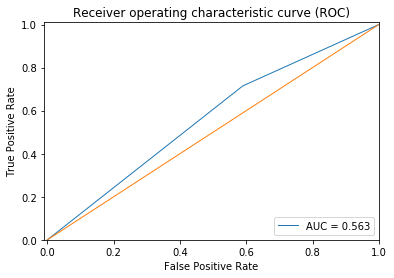

In [42]:
false_pos_rate, true_pos_rate, thresholds = roc_curve(y_pred1, test_labels)
roc_auc = auc(false_pos_rate, true_pos_rate)

plt.plot(false_pos_rate, true_pos_rate, linewidth=1, label='AUC = %0.3f'% roc_auc)
plt.plot([0,1],[0,1], linewidth=1)

plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Receiver operating characteristic curve (ROC)')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [43]:
#################### BaggingClassifier ###################

In [44]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
n_estimators = 10
start_time = time.time()
svm = BaggingClassifier(base_estimator=SVC(kernel='poly', C=1000, gamma='scale', max_iter=1000000), max_samples=1.0 / n_estimators, n_estimators=n_estimators, n_jobs=n_workers)
svm.fit(train_data, train_labels)
y_pred_2 = svm.predict(test_data)
accurracy_2= accuracy_score(test_labels, y_pred_2)  
fscore_2= f1_score(test_labels, y_pred_2 ) 
precision_2= precision_score(test_labels, y_pred_2)                              
recall_2 = recall_score(test_labels, y_pred_2)
elapsed_time_2 = time.time() - start_time                        

In [45]:
accurracy_2,  precision_2, recall_2, fscore_2,elapsed_time_2

(0.6767241379310345,
 0.7009345794392523,
 0.9316770186335404,
 0.7999999999999999,
 2.01472544670105)

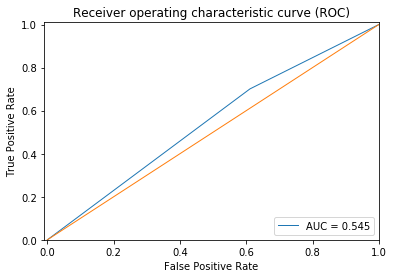

In [46]:
false_pos_rate, true_pos_rate, thresholds = roc_curve(y_pred_2, test_labels)
roc_auc = auc(false_pos_rate, true_pos_rate)

plt.plot(false_pos_rate, true_pos_rate, linewidth=1, label='AUC = %0.3f'% roc_auc)
plt.plot([0,1],[0,1], linewidth=1)

plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Receiver operating characteristic curve (ROC)')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()